# Does Renovation Effect House Price?

Here we will Ask 3 question:
    1. Does the house price go down as the age of the building increase?
    2. Does the the house price go down as time since renovation increases?
    3. If the house was not renovated:
           ->  Does the house price decrecre more than if it would have been renovated.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Add in Regresion Calculator

In [3]:
def mean_normalize(var):
    norm = []
    
    mean = sum(var)/len(var)
    
    for i in var:
        norm.append(i-mean)
    
    return norm

def dot_product(x, y):
    prodcut = 0
    
    for i in range(len(x)):
        prd = x[i]*y[i]
        prodcut += prd
    return prodcut

def covariance(var1, var2):
    n = len(var1)
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    
    dot_product(x, y)
    
def correlation(var1, var2):
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)

## Clean yr_ren

In [4]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

### Create an "age" column

In [8]:
now = 2016

In [9]:
df['age'] = now - df['yr_built']

# 1. Age vs Price

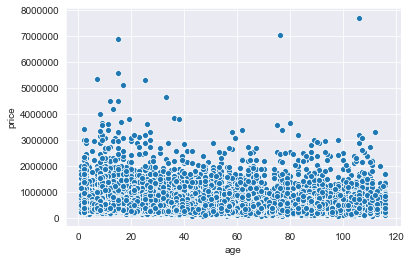

In [10]:
sns.scatterplot(data=df, x=df['age'], y=df['price'])

In [22]:
correlation(df['age'], df['price'])

-0.05

## Create age since renovation

In [11]:
df['age_since_ren'] = now - df['yr_renovated']

In [12]:
df['age_since_ren'].unique()

array([2.016e+03, 2.500e+01, 1.400e+01, 6.000e+00, 2.400e+01, 3.000e+00,
       2.200e+01, 3.800e+01, 1.100e+01, 1.300e+01, 3.200e+01, 6.200e+01,
       2.000e+00, 5.000e+00, 3.300e+01, 7.100e+01, 2.600e+01, 2.800e+01,
       3.900e+01, 3.500e+01, 2.100e+01, 1.600e+01, 1.700e+01, 1.800e+01,
       4.600e+01, 2.700e+01, 1.200e+01, 3.000e+01, 9.000e+00, 2.900e+01,
       1.000e+01, 3.100e+01, 1.500e+01, 3.600e+01, 4.500e+01, 3.700e+01,
       1.900e+01, 6.600e+01, 4.700e+01, 6.800e+01, 7.000e+00, 1.000e+00,
       4.200e+01, 8.000e+00, 4.800e+01, 4.000e+00, 5.300e+01, 6.500e+01,
       5.400e+01, 6.300e+01, 2.300e+01, 2.000e+01, 6.100e+01, 3.400e+01,
       6.000e+01, 7.600e+01, 4.000e+01, 7.000e+01, 4.100e+01, 5.200e+01,
       4.300e+01, 5.900e+01, 5.700e+01, 5.600e+01, 4.900e+01, 5.100e+01,
       8.200e+01, 4.400e+01, 7.200e+01, 5.800e+01])

In [23]:
df['age_since_ren'].head()

0    2016.0
1      25.0
2    2016.0
3    2016.0
4    2016.0
Name: age_since_ren, dtype: float64

# 2. Data Frame - Renovated House's

If 

age since renovation

In [13]:
df_ren = df.loc[df['yr_renovated'] != 0]

In [14]:
df_ren.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_since_ren
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,65,25.0
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,86,14.0
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045,70,25.0
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113,66,6.0
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275,102,24.0


In [15]:
df_ren.shape

(744, 23)

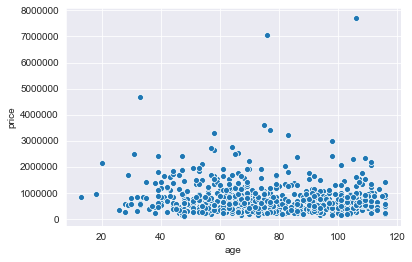

In [25]:
sns.scatterplot(data=df_ren, x=df_ren['age'], y=df_ren['price'])

### Calculating Correlation

What is the corelation between age since renovation & the price

In [24]:
correlation(df_ren['age'], df_ren['price'])

-0.07

## DataFrame - Non_Renovated House's

In [18]:
df_non_ren = df.loc[df['yr_renovated'] == 0]

In [19]:
df_non_ren.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_since_ren
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,61,2016.0
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,83,2016.0
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,51,2016.0
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,29,2016.0
5,7237550310,5/12/2014,1230000.0,4,4.5,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,15,2016.0


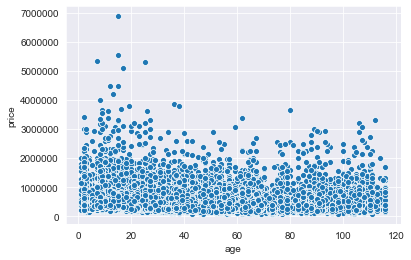

In [20]:
sns.scatterplot(data=df_non_ren, x=df_non_ren['age'], y=df_non_ren['price'])

### Calculating Correlation

What is the corelation between age if not renovated & the price

In [26]:
correlation(df_non_ren['age'], df_non_ren['price'])

-0.08